Ref. Datacamp

NetworkX API basics

In [3]:
import networkx as nx
import matplotlib as plt
%matplotlib inline
from itertools import combinations

In [23]:
G = nx.Graph()

In [24]:
G.add_nodes_from([1, 2, 3])

In [5]:
G.nodes()

[1, 2, 3]

In [6]:
type(G.nodes())

list

In [18]:
G.add_edge(1,2)

In [19]:
G.edges()

[(1, 2)]

The .nodes() method returns a list of nodes, while the .edges() method returns a list of tuples, in which each tuple shows the nodes that are present on that edge.

In [20]:
G.node[1]['color'] = 'blue'

Above adding to the node 1, a key named 'color' which has the value 'blue'. Note how this is very similar to a dictionary. 

In [21]:
G.nodes()

[1, 2, 3]

In [22]:
G.nodes(data = True)

[(1, {'color': 'blue'}), (2, {}), (3, {})]

Passing in the keyword argument data=True in these methods retrieves the corresponding metadata associated with the nodes and edges as well.

In [23]:
G.node[2]['feeling'] = 'happy'

In [24]:
G.nodes(data = True)

[(1, {'color': 'blue'}), (2, {'feeling': 'happy'}), (3, {})]

Above command returns a list of two tuples in which the first element of the each tuple is a node and the second element is the dictionary in which the key value pair correspond to metadata.

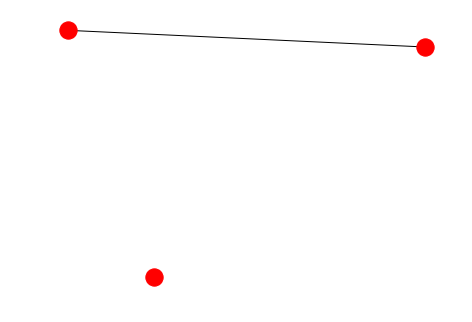

In [27]:
nx.draw(G)

What we have above is called the node-link diagram rendering of the graph.

### Types of graphs

** Undirected graphs: **
Do not have any inherent directionality associated with them. 

In [28]:
type(G)

networkx.classes.graph.Graph

Undirected graphs have the type graph. 

**Directed graphs:** E.g., Twitter's social graph (has the information of who follows whom).  

In [29]:
D = nx.DiGraph()

In [30]:
type(D)

networkx.classes.digraph.DiGraph

Trips between bike sharing stations may be modeled as multi(Di)Graphs. Each trip being one edge between the pair of stations. 

In [32]:
M = nx.MultiGraph()
type(M)

networkx.classes.multigraph.MultiGraph

In [33]:
MD = nx.MultiDiGraph()
type(MD)

networkx.classes.multidigraph.MultiDiGraph

For memory reasons, we might not want to model multiple edges per pair of nodes and therefore we may want to collapse the edges into a single edge that contains the metadata summary of the original. 

For example edge metadata with value 3 for three rides. 

** Self-loops **

Nodes that are connected to themselves. E.g., bike sharing data, where trip begins at a station and ends at the same session. 

### Visualizing networks

#### Matrix plots:
Nodes are the rows and columns in the matrix and elements are filled in depending on if there is edge in between them. For an undirected graph, the matrix is symmetric along the diagonal. For a directed graph, the matrix is not necessarily symmetric. For instance if there is an edge pointing from point A to B, the element AB is filled, but the element BA is not. 

#### Arc plot:
Nodes are ordered along one axis of the plot and edges are drawn using circular arcs from one node to another. If nodes are ordered according to some sort of a rule, e.g., age of social media network of users or geographical proximity of a stations in transport network. Helps to understand connectivity and sorted or grouped property. 

#### Circos plot: 
Transformation of the arc plot such that two ends of the arc plots are joined together in a circle. Aesthetically compact alternative to arc plots. 

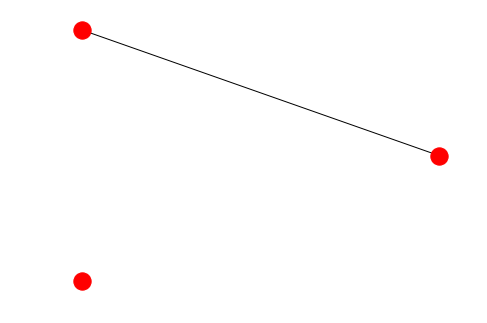

In [35]:
nx.draw_circular(G)

### Identifying node importance

* Degree centrality: 
Number of neighbors node has / number of neighbors node could possibly have.

If self loops allowed: # of neighbors a node could possibly have is every single node in the graph including myself. 

If self loops not allowed: # of neighbors a node could possibly have is every single node in the graph excluding myself. 

Examples of nodes with high degree centrality: 
1. Twitter broadcasters (people who have many follower)
2. Airport transportation hubs
3. Disease super-spreaders. 


* Betweeness centrality

In [2]:
G = nx.Graph()

In [3]:
G.add_nodes_from(range(1,10))

In [4]:
G.nodes()

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
G.add_edges_from([(1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), (1,9)])

In [6]:
G.edges()

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9)]

In [7]:
G.edges(data = True)

[(1, 2, {}),
 (1, 3, {}),
 (1, 4, {}),
 (1, 5, {}),
 (1, 6, {}),
 (1, 7, {}),
 (1, 8, {}),
 (1, 9, {})]

In [8]:
G.edge[1]

{2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}}

In [9]:
G.edge[2]

{1: {}}

In [10]:
G.edge[3]

{1: {}}

In [11]:
G.edge[1][2]

{}

In [12]:
G.edge[1][2]['attribute'] = 42

In [13]:
G.edge[1]

{2: {'attribute': 42}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}}

network_name.edge['node_number'] gives all the edges associated with the nodenumber along with their metadata.

network_name.edge['node_number1']['node_number2'] gives the meta data associated with the edge connecting node_number1 and node_number2. 

network_name.edge['node_number1']['node_number2']['attribute'] = value adds (modifies if already present) the key 'attribute' to have the value = value. 

In [14]:
G.edge[1][2]

{'attribute': 42}

In [17]:
G.edges()

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9)]

In [18]:
type(G.edge[1])

dict

In [19]:
G.neighbors(1)

[2, 3, 4, 5, 6, 7, 8, 9]

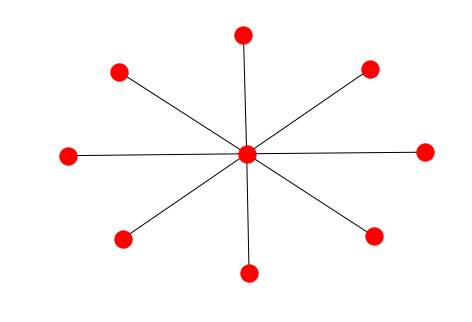

In [21]:
nx.draw(G)

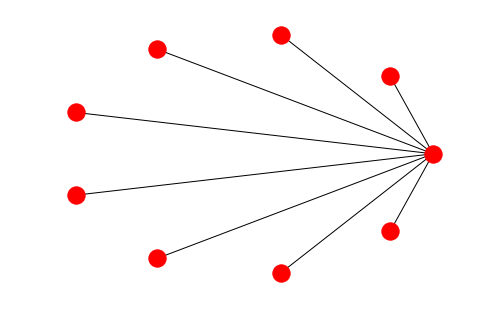

In [47]:
nx.draw_circular(G)

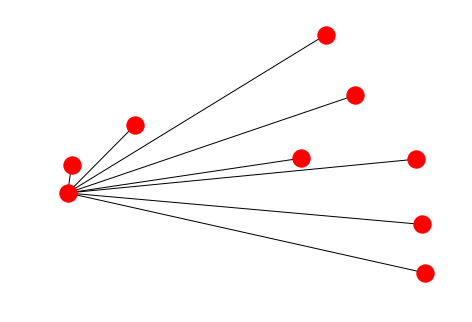

In [49]:
nx.draw_random(G)

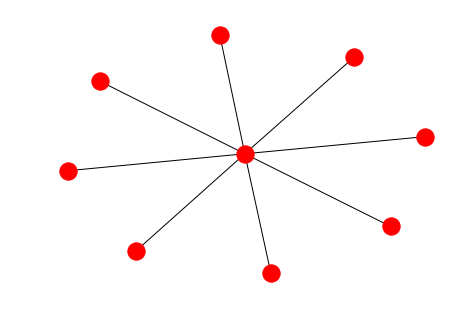

In [50]:
nx.draw_spring(G)

In [54]:
G.neighbors(2)

[1]

In [58]:
next(G.neighbors_iter(1))

2

In [59]:
next(G.neighbors_iter(1))

2

In [60]:
for i in G.neighbors_iter(1):
    print i

2
3
4
5
6
7
8
9


In [64]:
nx.degree_centrality(G)
# key is the node and the value is the degree centrality. 
# In the degree centrality function, self loops are 
# not considered. 

{1: 1.0,
 2: 0.125,
 3: 0.125,
 4: 0.125,
 5: 0.125,
 6: 0.125,
 7: 0.125,
 8: 0.125,
 9: 0.125}

## Graph algorithms

### Finding paths

Pathfinding is important for: 

* Optimization: e.g., the shortest transport paths
* Modeling: e.g., disease spread, information passing

#### Algorithm: breadth-first search algorithm 

BFS first developed in 1950s to find the shortest path out of a maze. 

Say be want shortest path from node A to node B. Look at the neighbors of A, if node B among the neighbors of A, then stop. If not then look at the neighbors of neighbors of A and so on. 

In [65]:
len(G.edges())

8

In [66]:
len(G.nodes())

9

In [67]:
G

### Betweenness centrality

Definition: 

num. of shortest paths that pass through the node / all possible shortest paths 

Degree centrality identifies the most connected node. Betweeness centrality identifies the bottleneck nodes. 

Application:

* Bridges between liberal-and conservative leaning Twitter users.

* Critical information transfer links. 

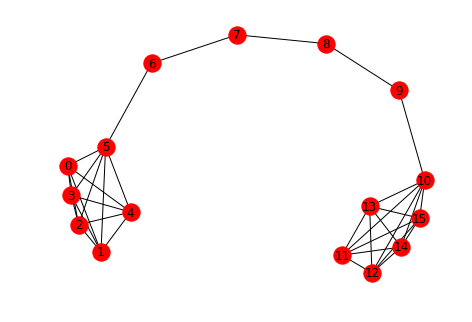

In [27]:
Gbarbell = nx.barbell_graph(m1=6, m2=4)
nx.draw(Gbarbell, with_labels=True)

Notice how barbell graph changes on each run. m1 is the number of nodes in each of the bars. m2 is the number of nodes in the link. 

In [97]:
nx.degree_centrality(Gbarbell)

{0: 0.3333333333333333,
 1: 0.3333333333333333,
 2: 0.3333333333333333,
 3: 0.3333333333333333,
 4: 0.3333333333333333,
 5: 0.4,
 6: 0.13333333333333333,
 7: 0.13333333333333333,
 8: 0.13333333333333333,
 9: 0.13333333333333333,
 10: 0.4,
 11: 0.3333333333333333,
 12: 0.3333333333333333,
 13: 0.3333333333333333,
 14: 0.3333333333333333,
 15: 0.3333333333333333}

In [98]:
nx.betweenness_centrality(Gbarbell)

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.4761904761904762,
 6: 0.5142857142857143,
 7: 0.5333333333333334,
 8: 0.5333333333333334,
 9: 0.5142857142857143,
 10: 0.4761904761904762,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0}

### Cliques

Network clique: completely connected graphs. Each node is connected to every other node. 

Simplest clique: An edge connecting two nodes. 

Simplest non-trivial clique: A triangle (Applied in friend recommendation systems: called triangle closure). 

In [99]:
Gbarbell.nodes()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [101]:
combinations(Gbarbell.nodes(), 2)

In [103]:
next(combinations(Gbarbell.nodes(), 2))

(0, 1)

In [106]:
combinations(Gbarbell.nodes(), 2)

In [109]:
for n1, n2, n3 in combinations(Gbarbell.nodes(), 3):
    print n1, n2, n3

0 1 2
0 1 3
0 1 4
0 1 5
0 1 6
0 1 7
0 1 8
0 1 9
0 1 10
0 1 11
0 1 12
0 1 13
0 1 14
0 1 15
0 2 3
0 2 4
0 2 5
0 2 6
0 2 7
0 2 8
0 2 9
0 2 10
0 2 11
0 2 12
0 2 13
0 2 14
0 2 15
0 3 4
0 3 5
0 3 6
0 3 7
0 3 8
0 3 9
0 3 10
0 3 11
0 3 12
0 3 13
0 3 14
0 3 15
0 4 5
0 4 6
0 4 7
0 4 8
0 4 9
0 4 10
0 4 11
0 4 12
0 4 13
0 4 14
0 4 15
0 5 6
0 5 7
0 5 8
0 5 9
0 5 10
0 5 11
0 5 12
0 5 13
0 5 14
0 5 15
0 6 7
0 6 8
0 6 9
0 6 10
0 6 11
0 6 12
0 6 13
0 6 14
0 6 15
0 7 8
0 7 9
0 7 10
0 7 11
0 7 12
0 7 13
0 7 14
0 7 15
0 8 9
0 8 10
0 8 11
0 8 12
0 8 13
0 8 14
0 8 15
0 9 10
0 9 11
0 9 12
0 9 13
0 9 14
0 9 15
0 10 11
0 10 12
0 10 13
0 10 14
0 10 15
0 11 12
0 11 13
0 11 14
0 11 15
0 12 13
0 12 14
0 12 15
0 13 14
0 13 15
0 14 15
1 2 3
1 2 4
1 2 5
1 2 6
1 2 7
1 2 8
1 2 9
1 2 10
1 2 11
1 2 12
1 2 13
1 2 14
1 2 15
1 3 4
1 3 5
1 3 6
1 3 7
1 3 8
1 3 9
1 3 10
1 3 11
1 3 12
1 3 13
1 3 14
1 3 15
1 4 5
1 4 6
1 4 7
1 4 8
1 4 9
1 4 10
1 4 11
1 4 12
1 4 13
1 4 14
1 4 15
1 5 6
1 5 7
1 5 8
1 5 9
1 5 10
1 5 11
1 5 12
1 5 13


#### Maximal clique

A clique that when extended by one node is no longer a clique.

find_cliques function in NetworkX API finds all **maximal** cliques

In [4]:
Gbarbell = nx.barbell_graph(m1 = 5, m2 = 1)

In [29]:
nx.find_cliques(Gbarbell)

<generator object find_cliques at 0x7f04097a0eb0>

In [33]:
list(nx.find_cliques(Gbarbell))

[[4, 0, 1, 2, 3], [4, 5], [6, 8, 9, 10, 7], [6, 5]]

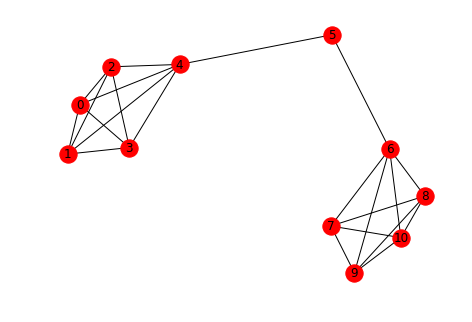

In [34]:
nx.draw(Gbarbell, with_labels=True)

### subgraphs

Used to visualize portions of a large graph to find paths, communities/ cliques,or degrees of separation from a node. 

In [41]:
G = nx.erdos_renyi_graph(n = 20, p =0.2)

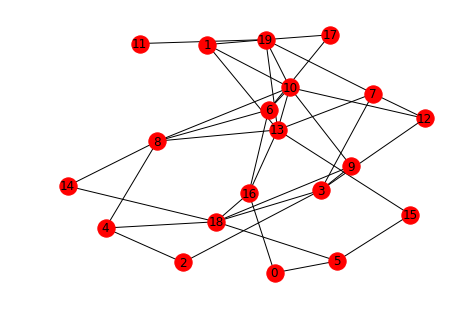

In [42]:
nx.draw(G, with_labels=True)

In [44]:
nodes = G.neighbors(8)
nodes

[10, 14, 4, 13, 6]

In [45]:
nodes.append(8)

In [46]:
nodes

[10, 14, 4, 13, 6, 8]

In [47]:
G8 = G.subgraph(nodes)

In [48]:
G8.edges()

[(4, 8), (6, 8), (6, 10), (8, 10), (8, 14), (8, 13), (10, 13)]

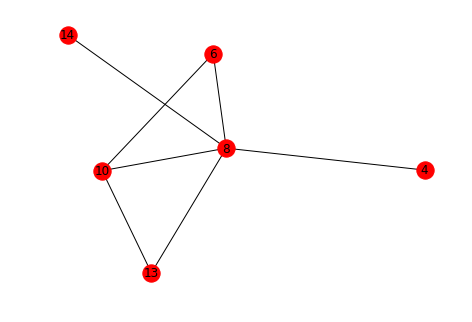

In [49]:
nx.draw(G8, with_labels=True)

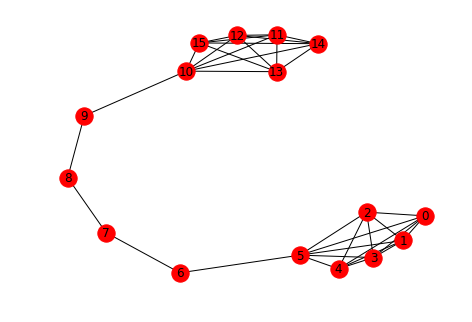

In [30]:
nx.draw(Gbarbell, with_labels=True)

In [31]:
nx.to_numpy_matrix(Gbarbell)

matrix([[ 0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
          0.,  0.,  0.],
        [ 

In [32]:
import seaborn as sns

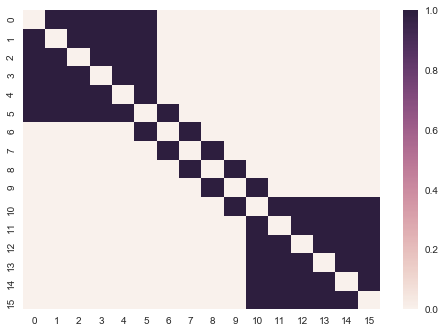

In [34]:
sns.heatmap(nx.to_numpy_matrix(Gbarbell));

Playing around with the set data structure

In [35]:
s = set()

In [36]:
s.add(1)

In [37]:
s

{1}

In [39]:
s.add(2)
s.add(3)

In [40]:
s

{1, 2, 3}

In [41]:
s.add(2)

In [42]:
s

{1, 2, 3}

In [44]:
l = [4, 5]

In [45]:
l.extend([5, 6])

In [46]:
l

[4, 5, 5, 6]

In [47]:
set(l)

{4, 5, 6}

In [48]:
deg_cent = nx.degree_centrality(Gbarbell)

In [49]:
deg_cent

{0: 0.3333333333333333,
 1: 0.3333333333333333,
 2: 0.3333333333333333,
 3: 0.3333333333333333,
 4: 0.3333333333333333,
 5: 0.4,
 6: 0.13333333333333333,
 7: 0.13333333333333333,
 8: 0.13333333333333333,
 9: 0.13333333333333333,
 10: 0.4,
 11: 0.3333333333333333,
 12: 0.3333333333333333,
 13: 0.3333333333333333,
 14: 0.3333333333333333,
 15: 0.3333333333333333}

In [55]:
for k, v in deg_cent.items():
    print k, v

0 0.333333333333
1 0.333333333333
2 0.333333333333
3 0.333333333333
4 0.333333333333
5 0.4
6 0.133333333333
7 0.133333333333
8 0.133333333333
9 0.133333333333
10 0.4
11 0.333333333333
12 0.333333333333
13 0.333333333333
14 0.333333333333
15 0.333333333333


In [56]:
nx.triangles(Gbarbell)

{0: 10,
 1: 10,
 2: 10,
 3: 10,
 4: 10,
 5: 10,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 10,
 11: 10,
 12: 10,
 13: 10,
 14: 10,
 15: 10}

nx.triangles() counts every node that the triangle is involved in. 

In [57]:
nx.triangles(Gbarbell)[0]

10

In [72]:
G2 = nx.erdos_renyi_graph(n=100, p=0.03)

In [73]:
nx.connected_component_subgraphs(G)

<generator object connected_component_subgraphs at 0x7f621ba8df00>

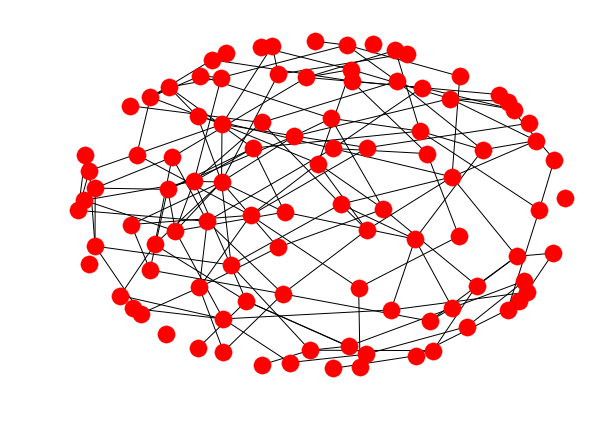

In [74]:
nx.draw(G2)

In [75]:
list(nx.connected_component_subgraphs(G2))

In [76]:
for g in list(nx.connected_component_subgraphs(G2)):
    print len(g.nodes())

94
1
1
1
1
1
1


The six isolated nodes can't be accessed from any other nodes in the graph, because no edge exists between the isolated nodes and the other nodes. 

In [77]:
aset = set([1, 2, 2, 3])

In [78]:
bset = set([3, 4, 5])

In [79]:
aset

{1, 2, 3}

In [80]:
bset

{3, 4, 5}

In [81]:
aset.union(bset)

{1, 2, 3, 4, 5}

In [82]:
aset.intersection(bset)

{3}

In [83]:
Gbarbell.edges()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 4),
 (3, 5),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 10),
 (10, 11),
 (10, 12),
 (10, 13),
 (10, 14),
 (10, 15),
 (11, 12),
 (11, 13),
 (11, 14),
 (11, 15),
 (12, 13),
 (12, 14),
 (12, 15),
 (13, 14),
 (13, 15),
 (14, 15)]

In [5]:
type(Gbarbell.edges())

list

G.edges() gives a list of tuples.